In [40]:
!pip install matplotlib
!pip install numpy 
!pip install seaborn
!pip install tqdm
!pip install gymnasium
!pip install gymnasium[toy_text]
%matplotlib inline
!pip install pygame

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
^C


In [313]:
import numpy as np
import pandas as pd
import gymnasium as gym
import time
from tqdm import tqdm
import math
from __future__ import annotations
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Patch
import pygame
import IPython.display as display
from scipy import stats as st
import matplotlib.cm as cm

In [314]:
#keep start_epsilon to 1 if checking with decay on!
#start_epsilon = 1.0 
#decay_ON= True

#start_epsilon is what we changed to get performance over various epsilon values
start_epsilon = 0.9 
decay_ON= False

#Comment/Uncomment according to the env you want to run this for.
#qenv = gym.make("CliffWalking-v0", render_mode='rgb_array')
#n_episodes = 2000
qenv = gym.make("Blackjack-v1", sab=True, render_mode ='rgb_array')
n_episodes = 100000


#DO NOT RUN Cliffwalking FOR MORE THAN 2000 WITH EPSILON DECAY ON!!!!PERFORMANCE DROPS A LOT!!!
#WE CAN ALSO STUDY THE EFFECT OF EPSILON ON CALCULATION TIME SINCE KEEPING IT CLOSER TO ONE INCREASES CALCULATION TIME A LOT!

In [315]:
# hyperparameters for Qlearning
learning_rate = 0.01
#We can disable Decay if needed, for the experiments we have kept decay on!
epsilon_decay = start_epsilon / (n_episodes / 2)  # reduce the exploration over time
final_epsilon = 0.1
discount_factor = 0.95
#If need to see the renders on notebook change showrenderforep to small number like 1000
stopfor = 0.1
showrenderforep = 500000
qenv = gym.wrappers.RecordEpisodeStatistics(qenv, deque_size=n_episodes)

In [316]:
class QLearningAgent:
    def __init__(
        self,
        learning_rate: float,
        initial_epsilon: float,
        epsilon_decay: float,
        final_epsilon: float,
        discount_factor: float,
    ):
        self.q_values = defaultdict(lambda: np.zeros(qenv.action_space.n))
        self.lr = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = initial_epsilon
        self.epsilon_decay = epsilon_decay
        self.final_epsilon = final_epsilon

        
    def get_action(self, obs: tuple[int, int, bool]) -> int:
        if np.random.random() < self.epsilon:
            return qenv.action_space.sample()
        else:
            return int(np.argmax(self.q_values[obs]))

    def update(
        self,
        obs: tuple[int, int, bool],
        action: int,
        reward: float,
        terminated: bool,
        next_obs: tuple[int, int, bool],
    ):
        future_q_value = (not terminated) * np.max(self.q_values[next_obs])
        temporal_difference = (
            reward + self.discount_factor * future_q_value - self.q_values[obs][action]
        )
        self.q_values[obs][action] = (
            self.q_values[obs][action] + self.lr * temporal_difference
        )
        
    #def predict(self, obs):
        #obs_list = self.q_values
        #rw_max = np.max(obs_list)
        #action_list = np.where(obs_list == rw_max)[0]
        #action = np.random.choice(action_list)
        #return action
    
    def decay_epsilon(self):
        self.epsilon = max(self.final_epsilon, self.epsilon - epsilon_decay)
    
    def run_Qlearning(self,reward_Q):
        for episode in tqdm(range(1,n_episodes+1)):
            obs, info = qenv.reset()
            done = False
            while not done:
                #if episode % showrenderforep == 0 and episode!=0:
                    #print('After handing cards')  
                    #time.sleep(0.2)
                    #display.display(plt.gcf())
                    #display.clear_output(wait=True)
                    #plt.imshow( qenv.render() )
                    #plt.show()
                    #print("_________________________________________")
                    #print("obs is ",obs)
                    #print("episode {}".format(episode))
                    #print("player has", qenv.player)
                    #print('dealer', qenv.dealer)          
                    #time.sleep(stopfor)
                action = qlagent.get_action(obs)
                next_obs, reward, terminated, truncated, info = qenv.step(action)
                #if episode % showrenderforep == 0 and episode!=0:
                    
                    #if(action==0): 
                        #print('Action taken is stand')
                        #print("_________________________________________")
                        #print("player has", qenv.player)
                        #print('dealer has', qenv.dealer)
                        #time.sleep(stopfor)
                    #else:
                        #print('Action taken is hit')
                        #print("_________________________________________")
                        #print("player has", qenv.player)
                        #print('dealer has', qenv.dealer)                
                        #time.sleep(stopfor)
                        
                reward_Q1.append(reward) 
                # update the qlagent
                qlagent.update(obs, action, reward, terminated, next_obs)
                # update if the qenvironment is done and the current obs
                done = terminated or truncated
                obs = next_obs
                reward_Q=reward_Q+reward
                
            if episode % showrenderforep == 0 and episode!=0:
                #clear_output(wait=True)
                plt.imshow( qenv.render() )
                print('After taking action')
                plt.show()
                ##time.sleep(stopfor)
                #clear_output(wait=True)      
            if episode % showrenderforep == 0 and episode!=0: 
                    if(done): 
                        print('final episode ended')
                        time.sleep(20)
                        #clear_output(wait=True)
            if(decay_ON):
                qlagent.decay_epsilon()
                

class SARSAAgent:
    def __init__(
        self,
        learning_rate: float,
        initial_epsilon: float,
        epsilon_decay: float,
        final_epsilon: float,
        discount_factor: float,
    ):
        self.q_values = defaultdict(lambda: np.zeros(senv.action_space.n))
        self.lr = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = initial_epsilon
        self.epsilon_decay = epsilon_decay
        self.final_epsilon = final_epsilon
        
    def get_action(self, obs: tuple[int, int, bool]) -> int:
        if np.random.random() < self.epsilon:
            return senv.action_space.sample()
        else:
            return int(np.argmax(self.q_values[obs]))

    def update(
        self,
        obs: tuple[int, int, bool],
        action: int,
        s_reward: float,
        terminated: bool,
        next_obs: tuple[int, int, bool],
        next_action
    ):
        future_q_value = (not terminated) * self.q_values[next_obs][next_action]
        temporal_difference = (
            s_reward + self.discount_factor * future_q_value - self.q_values[obs][action]
        )
        self.q_values[obs][action] = (
            self.q_values[obs][action] + self.lr * temporal_difference
        )

    def decay_epsilon(self):
        self.epsilon = max(self.final_epsilon, self.epsilon - epsilon_decay)
    
    def run_Sarsa(self,reward_S):
        for episode in tqdm(range(1,n_episodes+1)):
            obs, info = senv.reset()
            done = False
            while not done:
                if episode % showrenderforep == 0:
                    print('After handing cards')  
                    plt.imshow( senv.render() )
                    plt.show()
                    print("_________________________________________")
                    #print("obs is ",obs)
                    print("episode {}".format(episode))
                    #print("player has", senv.player)
                    #print('dealer', senv.dealer)     
                    time.sleep(stopfor)

                action = sagent.get_action(obs)
                next_obs, s_reward, terminated, truncated, info = senv.step(action)
                next_action = sagent.get_action(next_obs)
                if episode % showrenderforep == 0:
                    if(action==0): 
                        print('Action taken is stand')
                        #print("_________________________________________")
                        #print("player has", senv.player)
                        #print('dealer has', senv.dealer)
                        time.sleep(stopfor)
                    else:
                        print('Action taken is hit')
                        print("_________________________________________")
                        #print("player has", senv.player)
                        #print('dealer has', senv.dealer)                
                        time.sleep(stopfor)

                # update the agent
                sagent.update(obs, action, s_reward, terminated, next_obs,next_action)

                # update if the environment is done and the current obs
                done = terminated or truncated
                obs = next_obs
                reward_S=reward_S+s_reward
                reward_S1.append(s_reward)
            if episode % showrenderforep == 0:
                #clear_output(wait=True)
                plt.imshow( senv.render() )
                print('After taking action')
                plt.show()
                time.sleep(stopfor)
                #clear_output(wait=True)

            if episode % showrenderforep == 0: 
                    if(done): 
                        print('episode ended')
            if(decay_ON):
                sagent.decay_epsilon()
            



In [251]:
qlagent = QLearningAgent(
    learning_rate=learning_rate,
    initial_epsilon=start_epsilon,
    epsilon_decay=epsilon_decay,
    final_epsilon=final_epsilon,
    discount_factor=discount_factor
)
reward_Q1 = []
reward_Q=0
#SELECT ENV
##qenv = gym.make("Blackjack-v1", sab=True, render_mode ='rgb_array')
#qenv = gym.make("CliffWalking-v0", render_mode='rgb_array')
##qenv = gym.wrappers.RecordEpisodeStatistics(qenv, deque_size=n_episodes)
qlagent.run_Qlearning(reward_Q)


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:22<00:00, 87.47it/s]


In [317]:
#keep start_epsilon to 1 if checking with decay on!
#start_epsilon = 1.0 
#decay_ON= True

#start_epsilon is what we changed to get performance over various epsilon values
start_epsilon = 0.9 
decay_ON= False

#Comment/Uncomment according to the env you want to run this for. DO NOT RUN Cliffwalking FOR MORE THAN 2000 PERFORMANCE DROPS A LOT

#senv = gym.make("CliffWalking-v0", render_mode='rgb_array')
#n_episodes = 2000

senv = gym.make("Blackjack-v1", sab=True, render_mode ='rgb_array')
n_episodes = 100000

#DO NOT RUN Cliffwalking FOR MORE THAN 2000 WITH EPSILON DECAY ON!!!!PERFORMANCE DROPS A LOT!!!
#WE CAN ALSO STUDY THE EFFECT OF EPSILON ON CALCULATION TIME SINCE KEEPING IT CLOSER TO ONE INCREASES CALCULATION TIME A LOT!



In [318]:
# hyperparameters for SARSA
learning_rate = 0.01
epsilon_decay = start_epsilon / (n_episodes / 2)  # reduce the exploration over time
final_epsilon = 0.1
discount_factor = 0.95
#If need to see the renders on notebook change showrenderforep to small number like 1000
stopfor = 0
showrenderforep = 2000000

senv = gym.wrappers.RecordEpisodeStatistics(senv, deque_size=n_episodes)


In [254]:
sagent = SARSAAgent(
    learning_rate=learning_rate,
    initial_epsilon=start_epsilon,
    epsilon_decay=epsilon_decay,
    final_epsilon=final_epsilon,
    discount_factor=discount_factor
)
reward_S1 = []
reward_S=0
sagent.run_Sarsa(reward_S)


100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:26<00:00, 76.60it/s]


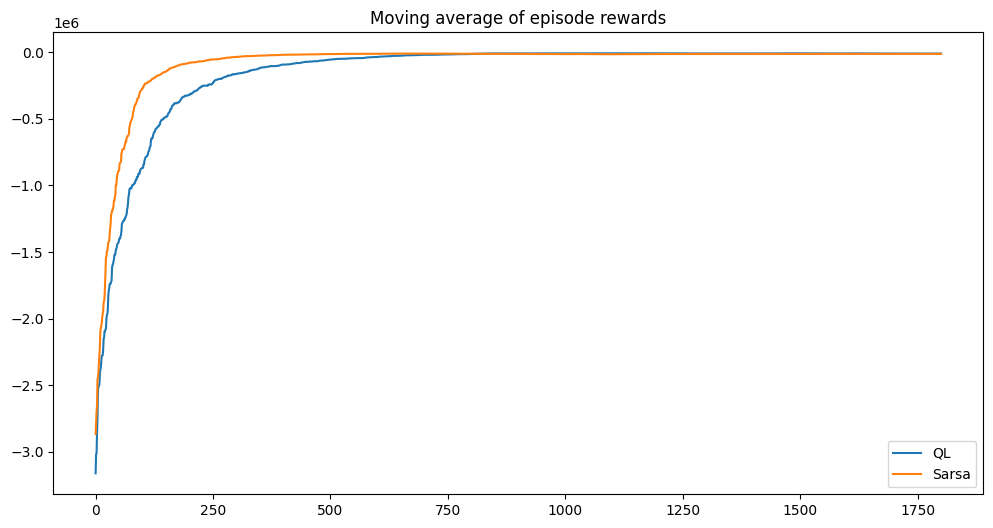

In [255]:
#Change rolling_length to 1 to get the actual reward vs episode plot
rolling_length = 200
#rolling_length = 250
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Moving average of episode rewards")

# Plot the second line
qlreward_moving_average = (
    np.convolve(
        np.array(qenv.return_queue).flatten(), np.ones(rolling_length), mode="valid"
    )
)
ax.plot(range(len(qlreward_moving_average)), qlreward_moving_average, label="QL")

# Plot the first line
sreward_moving_average = (
    np.convolve(
        np.array(senv.return_queue).flatten(), np.ones(rolling_length), mode="valid"
    )
)
ax.plot(range(len(sreward_moving_average)), sreward_moving_average, label="Sarsa")

# Set the legend
ax.legend(loc="lower right")
plt.show()

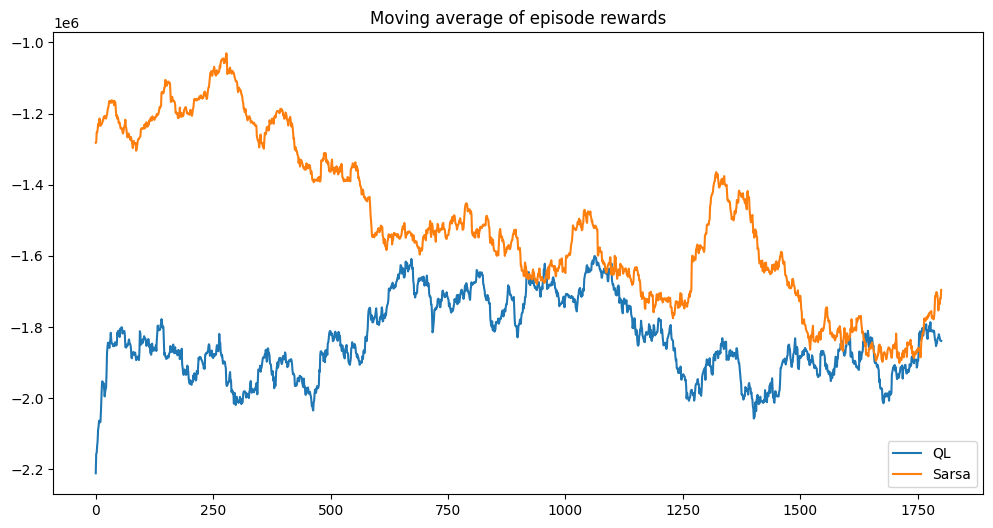

In [130]:
#Change rolling_length to 1 to get the actual reward vs episode plot
#rolling_length = 1
rolling_length = 200
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Moving average of episode rewards")

# Plot the second line
qlreward_moving_average = (
    np.convolve(
        np.array(qenv.return_queue).flatten(), np.ones(rolling_length), mode="valid"
    )
)
ax.plot(range(len(qlreward_moving_average)), qlreward_moving_average, label="QL")

# Plot the first line
sreward_moving_average = (
    np.convolve(
        np.array(senv.return_queue).flatten(), np.ones(rolling_length), mode="valid"
    )
)
ax.plot(range(len(sreward_moving_average)), sreward_moving_average, label="Sarsa")

# Set the legend
ax.legend(loc="lower right")
plt.show()

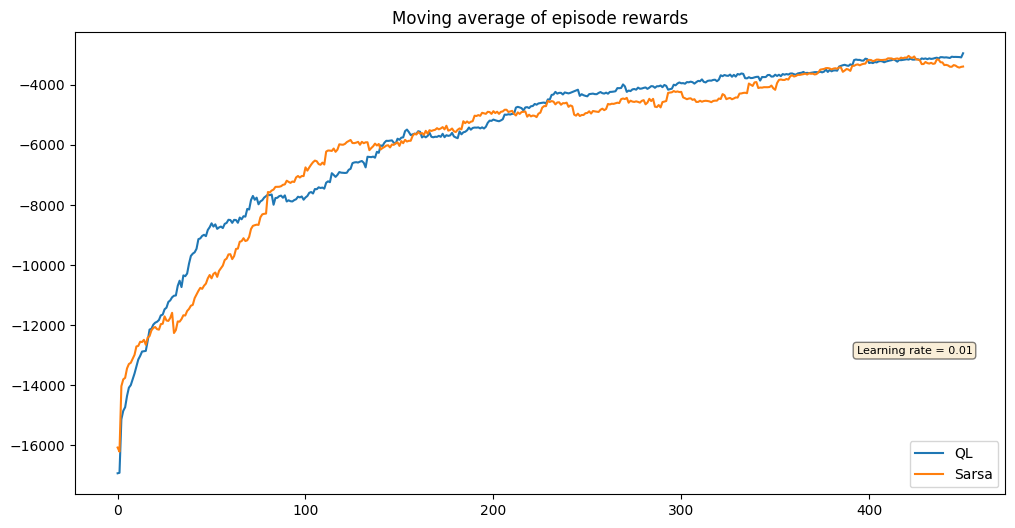

In [143]:
rolling_length = 50
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Moving average of episode rewards")

# Plot the second line
qlreward_moving_average = (
    np.convolve(
        np.array(qenv.return_queue).flatten(), np.ones(rolling_length), mode="valid"
    )
)
ax.plot(range(len(qlreward_moving_average)), qlreward_moving_average, label="QL")

# Plot the first line
sreward_moving_average = (
    np.convolve(
        np.array(senv.return_queue).flatten(), np.ones(rolling_length), mode="valid"
    )
)
ax.plot(range(len(sreward_moving_average)), sreward_moving_average, label="Sarsa")

# Set the legend
ax.legend(loc="lower right")

# Set the text
ax.text(
    0.84,
    0.3,
    f"Learning rate = 0.01",
    transform=ax.transAxes,
    fontsize=8,
    verticalalignment="bottom",
    horizontalalignment="left",
    bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5),
)
plt.show()


In [319]:
epsilon_list = [0.2,0.1,0.05,0.01]

In [323]:
# Q-learning
lr = 0.01
gamma = 0.95
episode_max = 3000
sample_num = 5
reward_list = []
for j in range(len(epsilon_list)):
    reward_list.append([])
for i in range(sample_num):
    for j in range(len(epsilon_list)):
        reward_list[j].append([])
        e_greed = epsilon_list[j]

        agent_Q = QLearningAgent(lr,e_greed,epsilon_decay,final_epsilon,gamma)
        # train

        reward_episode = []
        qenv = gym.make("CliffWalking-v0", render_mode='rgb_array')

        qenv = gym.wrappers.RecordEpisodeStatistics(qenv, deque_size=n_episodes)
        for episode in tqdm(range(1,episode_max+1)):
            obs, info = qenv.reset()
            done = False
            reward_Q = 0
            while not done:
                action = agent_Q.get_action(obs)
                next_obs, reward, terminated, truncated, info = qenv.step(action)
                
                reward_list[j][-1].append(reward)
               
                # update the qlagent
                agent_Q.update(obs, action, reward, terminated, next_obs)
                # update if the qenvironment is done and the current obs
                done = terminated or truncated
                obs = next_obs
                reward_Q += reward
            
            reward_episode.append(reward_Q)
            
        reward_list[j][-1] = reward_episode
        
# Convert the reward_list to a numpy array
reward_array = np.vstack([np.array(reward_list[j]) for j in range(len(epsilon_list))])


100%|█████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:06<00:00, 441.16it/s]


In [324]:
reward_list=reward_array

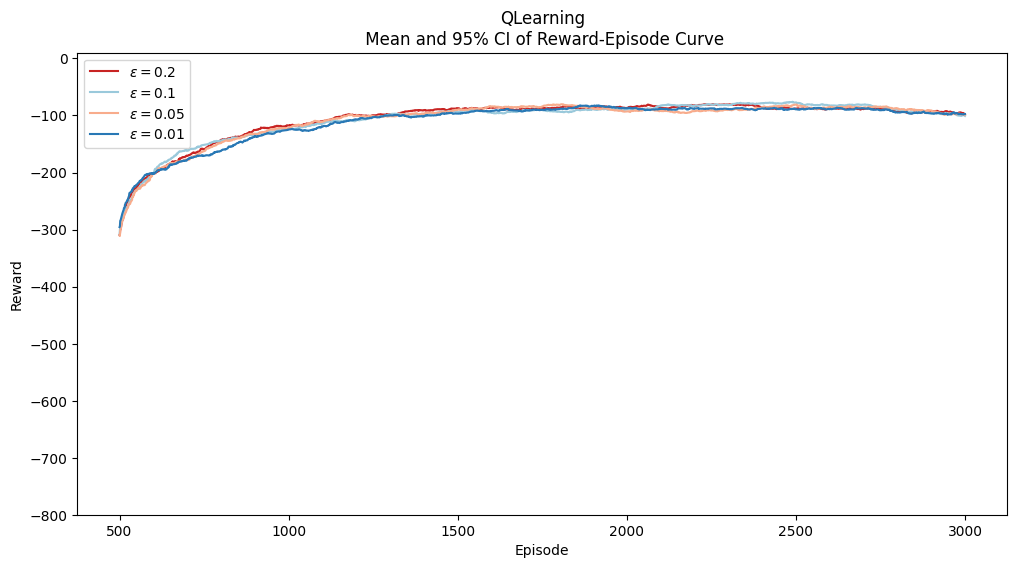

In [346]:
low_bound, high_bound = [], []
color_list = ['#c82423','#9ac9db','#f8ac8c','#2878b5']
rolling_window = 500

fig, ax = plt.subplots(figsize=(12, 6))  # Add figsize parameter here

for j in range(len(epsilon_list)):
    low_bound.append([])
    high_bound.append([])

    # Ensure reward_list[j] is at least 2D
    rewards = np.atleast_2d(reward_list[j])

    # Calculate the mean and 95% CI of the rewards
    mean_rewards = np.mean(rewards, axis=0)
    sem_rewards = st.sem(rewards, axis=0)
    df = rewards.shape[0] - 1
    low_bound[j], high_bound[j] = st.t.interval(0.95, df=df, loc=mean_rewards, scale=sem_rewards)

    # Add rolling average
    mean_rewards_rolling = pd.Series(mean_rewards).rolling(window=rolling_window).mean().values
    low_bound_rolling = pd.Series(low_bound[j]).rolling(window=rolling_window).mean().values
    high_bound_rolling = pd.Series(high_bound[j]).rolling(window=rolling_window).mean().values

    # Plot the mean and 95% CI of the rewards with rolling average
    ax.fill_between(range(1, episode_max+1), low_bound_rolling, high_bound_rolling, alpha=0.1, color=color_list[j])
    ax.plot(range(1, episode_max+1), mean_rewards_rolling, label='$\epsilon={}$'.format(epsilon_list[j]), color=color_list[j])


ax.set_xlabel('Episode')
ax.set_ylabel('Reward')
ax.legend()
ax.set_ylim(-800, 10)
ax.set_title('QLearning\n Mean and 95% CI of Reward-Episode Curve'.format(rolling_window))
plt.show()


In [326]:
# SARSA
lr = 0.01
gamma = 0.95
episode_max = 3000
sample_num = 5
reward_list1 = []
for j in range(len(epsilon_list)):
    reward_list1.append([])
for i in range(sample_num):
    for j in range(len(epsilon_list)):
        reward_list1[j].append([])
        e_greed = epsilon_list[j]

        agent_S = SARSAAgent(lr,e_greed,epsilon_decay,final_epsilon,gamma)
        # train

        reward_episode1 = []
        senv = gym.make("CliffWalking-v0", render_mode='rgb_array')
        senv = gym.wrappers.RecordEpisodeStatistics(senv, deque_size=n_episodes)

        for episode in tqdm(range(1,episode_max+1)):
            obs, info = senv.reset()
            done = False
            reward_S = 0
            while not done:
                action = agent_S.get_action(obs)
                next_obs, reward, terminated, truncated, info = senv.step(action)
                next_action = agent_S.get_action(next_obs)
                reward_list1[j][-1].append(reward)
               
                # update the qlagent
                agent_S.update(obs, action, reward, terminated, next_obs,next_action)
                # update if the qenvironment is done and the current obs
                done = terminated or truncated
                obs = next_obs
                reward_S += reward
            
            reward_episode1.append(reward_S)
            
        reward_list1[j][-1] = reward_episode1
        
# Convert the reward_list to a numpy array
reward_array1 = np.vstack([np.array(reward_list1[j]) for j in range(len(epsilon_list))])


100%|█████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:06<00:00, 453.89it/s]


In [327]:
reward_list1=reward_array1

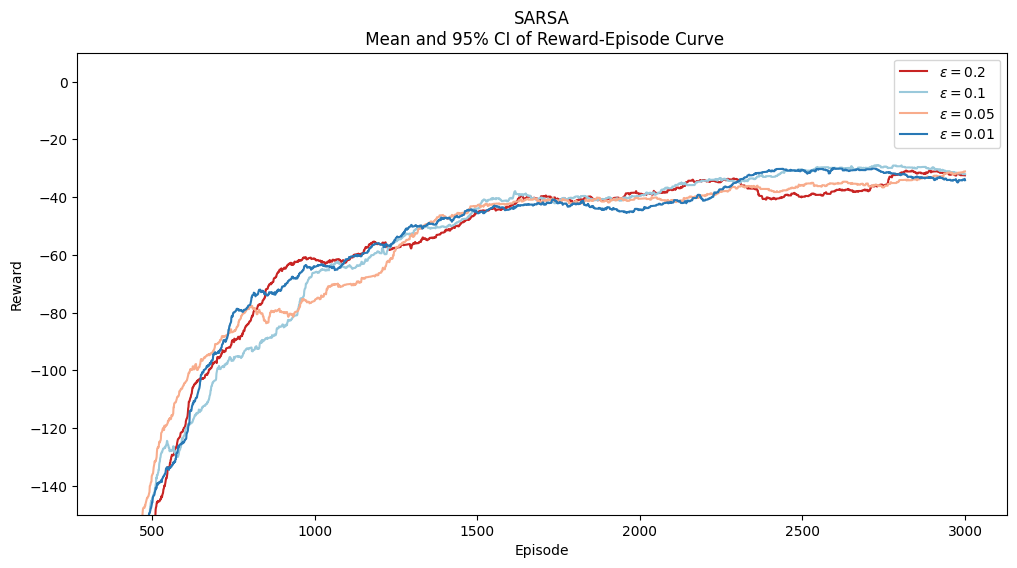

In [336]:
low_bound, high_bound = [], []
color_list = ['#c82423','#9ac9db','#f8ac8c','#2878b5']
rolling_window = 400

fig, ax = plt.subplots(figsize=(12, 6))  # Add figsize parameter here

for j in range(len(epsilon_list)):
    low_bound.append([])
    high_bound.append([])

    # Ensure reward_list[j] is at least 2D
    rewards = np.atleast_2d(reward_list1[j])

    # Calculate the mean and 95% CI of the rewards
    mean_rewards = np.mean(rewards, axis=0)
    sem_rewards = st.sem(rewards, axis=0)
    df = rewards.shape[0] - 1
    low_bound[j], high_bound[j] = st.t.interval(0.95, df=reward_list1[0], loc=mean_rewards, scale=sem_rewards)

    # Add rolling average
    mean_rewards_rolling = pd.Series(mean_rewards).rolling(window=rolling_window).mean().values
    low_bound_rolling = pd.Series(low_bound[j]).rolling(window=rolling_window).mean().values
    high_bound_rolling = pd.Series(high_bound[j]).rolling(window=rolling_window).mean().values

    # Plot the mean and 95% CI of the rewards with rolling average
    ax.fill_between(range(1, episode_max+1), low_bound_rolling, high_bound_rolling, alpha=0.2, color=color_list[j])
    ax.plot(range(1, episode_max+1), mean_rewards_rolling, label='$\epsilon={}$'.format(epsilon_list[j]), color=color_list[j])


ax.set_xlabel('Episode')
ax.set_ylabel('Reward')
ax.legend()
ax.set_ylim(-150, 10)
ax.set_title('SARSA\n Mean and 95% CI of Reward-Episode Curve'.format(rolling_window))
plt.show()
